<table width = 400 align="left" style="font-size:20px">
<tr>
    <td style="text-align:left"><b>Name</b></td>
    <td style="text-align:left">Aishwarya Chandramouli</td>
</tr>
<tr>
    <td> </td>
    <td style="text-align:left">ac78n@mst.edu</td> 
</tr>
<tr>
    <td style="text-align:left"><b>Course:</b></td>
    <td style="text-align:left">CS 5402</td>
</tr>
<tr>
    <td style="text-align:left"><b>Assignment:</b></td>
    <td style="text-align:left">Programming Assignment 04</td>
</tr>
<tr>
    <td style="text-align:left"><b>Date:</b></td>
    <td style="text-align:left">2021-07-19</td>
</tr>
</table>

In [37]:
# Imported for data management (dataframes)
import pandas as pd
import numpy as np

#Imported for regression
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

# Imported for visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Imported to create train/test partitioning
from sklearn.model_selection import train_test_split


#Imported for KNN Classification
from sklearn.neighbors import KNeighborsClassifier

# Imported to use confusion matrix.
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.datasets import load_iris

## Concept Description:

To create a model for determining whether patients have Chronic Heart disease or not using KNN (K Nearest Neighbour) Classifier.

## Data Collection:
This data set was provided by Perry B. koob as a part of our assignment. 

## Example Description:

<b>age</b>  
This is an Interval attribute which describes the age of the patient

<b>cigsPerDay</b>  
This is a Ratio attribute which describes the number of cigarettes consumed by the patient per day

<b>totChol</b>  
This is a Ratio attribute which describes the Total Cholestrol level

<b>sysBP</b>  
This is an Interval attribute that describes the Systolic Blood Pressure

<b>diaBP</b>  
This is an Interval attribute that describes the Diastolic Blood Pressure

<b>BMI</b>  
This is an Interval attribute that describes Body Mass Index

<b>heartRate</b>  
This is a Ratio attribute that describes the Heart Rate of the patient

<b>glucose</b>  
This is an Interval attribute that describes the Blood Glucose level of the patient

<b>CHD</b>  
This is Ordinal since the patients are classified as either having CHD (CHD = 1) or does not have CHD(CHD=0)

## Data Import and Wrangling: 

The results of each search is read from the respective comma separated value file (csv) into separate dataframes.  Careful attention is paid to make sure the data is read in as character strings.

In [2]:
#reading the data from csv into a dataframe
df_chd = pd.read_csv("heart-disease-data.csv")
df_chd

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose,CHD
0,39,0,195,106.0,70.0,26.97,80,77,0
1,46,0,250,121.0,81.0,28.73,95,76,0
2,48,20,245,127.5,80.0,25.34,75,70,0
3,61,30,225,150.0,95.0,28.58,65,103,1
4,46,23,285,130.0,84.0,23.10,85,85,0
...,...,...,...,...,...,...,...,...,...
3809,68,0,176,168.0,97.0,23.14,60,79,1
3810,50,1,313,179.0,92.0,25.97,66,86,1
3811,51,43,207,126.5,80.0,19.71,65,68,0
3812,48,20,248,131.0,72.0,22.00,84,86,0


In [3]:
df_chd.columns

Index(['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate',
       'glucose', 'CHD'],
      dtype='object')

In [4]:
df_chd.isna().any()

age           False
cigsPerDay    False
totChol       False
sysBP         False
diaBP         False
BMI            True
heartRate     False
glucose       False
CHD           False
dtype: bool

## Exploratory Data Analysis:
Looking into what type of measure the attributes are.

In [5]:
df_chd.describe()

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose,CHD
count,3814.000000,3814.000000,3814.000000,3814.000000,3814.000000,3800.000000,3814.000000,3814.000000,3814.000000
mean,49.637389,8.983482,236.944940,132.457787,82.938647,25.806174,75.708705,81.921867,0.154693
std,8.603110,11.920072,44.736793,22.167289,11.971146,4.068388,11.925696,24.023192,0.361659
min,32.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,42.000000,0.000000,206.000000,117.000000,75.000000,23.080000,68.000000,71.000000,0.000000
50%,49.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,56.750000,20.000000,264.000000,144.000000,90.000000,28.060000,82.000000,87.000000,0.000000
max,70.000000,70.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [6]:
df_chd.dtypes

age             int64
cigsPerDay      int64
totChol         int64
sysBP         float64
diaBP         float64
BMI           float64
heartRate       int64
glucose         int64
CHD             int64
dtype: object

In [7]:
#checking for null values
df_chd.isnull().sum()[1:9]

cigsPerDay     0
totChol        0
sysBP          0
diaBP          0
BMI           14
heartRate      0
glucose        0
CHD            0
dtype: int64

<AxesSubplot:>

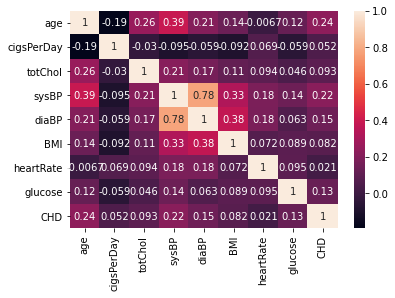

In [8]:
sns.heatmap(df_chd.corr(),annot=True)

### Handling examples of the attributes with null values

In [9]:
df_chd.isna().any()

age           False
cigsPerDay    False
totChol       False
sysBP         False
diaBP         False
BMI            True
heartRate     False
glucose       False
CHD           False
dtype: bool

In [10]:
df_new = df_chd[~df_chd['BMI'].isnull()]
x=df_new['diaBP']
x=sm.add_constant(x)
y=df_new['BMI']
model=sm.OLS(y,x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    BMI   R-squared:                       0.145
Model:                            OLS   Adj. R-squared:                  0.145
Method:                 Least Squares   F-statistic:                     644.1
Date:                Tue, 20 Jul 2021   Prob (F-statistic):          2.19e-131
Time:                        13:21:44   Log-Likelihood:                -10426.
No. Observations:                3800   AIC:                         2.086e+04
Df Residuals:                    3798   BIC:                         2.087e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.0679      0.427     35.247      0.000      14.230      15.906
diaBP          0.1295      0.005     25.379      0.000       0.119       0.139
==============================================================================
Omnibus:                      470.558   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              990.409
Skew:                           0.759   Prob(JB):                    8.62e-216
Kurtosis:                       4.988   Cond. No.                         587.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
df_chd['BMI'] = df_chd.apply(
    lambda row:
    0.1295* row.diaBP + 15.0679
    if np.isnan(row.BMI) else row.BMI,axis=1
)
df_chd.isna().sum()

age           0
cigsPerDay    0
totChol       0
sysBP         0
diaBP         0
BMI           0
heartRate     0
glucose       0
CHD           0
dtype: int64

From the above we can see that BMI attribute has null values.

In [12]:
df_chd.shape

(3814, 9)

In [13]:
df_BMI = df_chd.dropna(axis=0,subset=['BMI','diaBP'])
df_BMI = df_BMI.loc[:,['BMI','diaBP']]

In [14]:
noBMI= df_chd['BMI'].isnull()
diaBP_noBMI = pd.DataFrame(df_chd['diaBP'][noBMI])

In [15]:
df_BMI

,BMI,diaBP
0,26.97,70.0
1,28.73,81.0
2,25.34,80.0
3,28.58,95.0
4,23.10,84.0
...,...,...
3809,23.14,97.0
3810,25.97,92.0
3811,19.71,80.0
3812,22.00,72.0


#### Using Simple Linear Regression to impute the values

In [16]:
X= df_BMI[['diaBP']]
Y= df_BMI[['BMI']]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.80)
lm=LinearRegression().fit(X_train,Y_train)
BMI_predict = lm.predict(diaBP_noBMI)

In [17]:
diaBP_noBMI

,diaBP
91,60.0
1048,85.0
1446,75.0
1456,73.0
1474,93.0
1783,94.0
1844,61.0
1861,98.0
1881,100.0
1955,79.0


In [18]:
BMI_predict

array([[22.83021374],
       [26.04465595],
       [24.75887907],
       [24.50172369],
       [27.07327746],
       [27.20185515],
       [22.95879143],
       [27.7161659 ],
       [27.97332128],
       [25.27318982],
       [23.28023565],
       [25.40176751],
       [24.75887907],
       [26.55896671]])

In [19]:
df_diaBP_noBMI= pd.DataFrame(diaBP_noBMI)
df_diaBP_noBMI['BMI_pred'] = BMI_predict
df_diaBP_noBMI

,diaBP,BMI_pred
91,60.0,22.830214
1048,85.0,26.044656
1446,75.0,24.758879
1456,73.0,24.501724
1474,93.0,27.073277
1783,94.0,27.201855
1844,61.0,22.958791
1861,98.0,27.716166
1881,100.0,27.973321
1955,79.0,25.273190


In [54]:
df_chd

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose,CHD
0,39.0,0.0,195.0,106.0,70.0,26.97,80.0,77.0,0.0
1,46.0,0.0,250.0,121.0,81.0,28.73,95.0,76.0,0.0
2,48.0,20.0,245.0,127.5,80.0,25.34,75.0,70.0,0.0
3,61.0,30.0,225.0,150.0,95.0,28.58,65.0,103.0,1.0
4,46.0,23.0,285.0,130.0,84.0,23.10,85.0,85.0,0.0
...,...,...,...,...,...,...,...,...,...
3809,68.0,0.0,176.0,168.0,97.0,23.14,60.0,79.0,1.0
3810,50.0,1.0,313.0,179.0,92.0,25.97,66.0,86.0,1.0
3811,51.0,43.0,207.0,126.5,80.0,19.71,65.0,68.0,0.0
3812,48.0,20.0,248.0,131.0,72.0,22.00,84.0,86.0,0.0


## Mining or Analytics:

#### KNN classification on the final data.

In [55]:
X=df_chd.drop(columns=['CHD']) 
Y=df_chd[['CHD']]
#patitioning the data into train data split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.8)

### When k = 3

In [56]:
model=KNeighborsClassifier(n_neighbors=3)
model.fit(X_train,Y_train['CHD'])
y_pred=model.predict(X_test)
pred=pd.DataFrame(y_pred)
pred.rename(columns={0:"pred"},inplace=True)
results=pd.concat([pred,Y_test.reset_index(drop=True)],axis=1)
cm=confusion_matrix(results['CHD'],results['pred'])
print("Confusion matrix when k=",3,"is \n",cm)
acc_score=accuracy_score(results['CHD'],results['pred'])
print("Accuracy Score when k=",3,"is",acc_score)
error_rate=1-acc_score
print("error rate when k=",3,"is",error_rate)

Confusion matrix when k= 3 is 
 [[593  48]
 [105  17]]
Accuracy Score when k= 3 is 0.799475753604194
error rate when k= 3 is 0.20052424639580602


### When k = 5

In [57]:
model=KNeighborsClassifier(n_neighbors=5)
model.fit(X_train,Y_train['CHD'])
y_pred=model.predict(X_test)
pred=pd.DataFrame(y_pred)
pred.rename(columns={0:"pred"},inplace=True)
results=pd.concat([pred,Y_test.reset_index(drop=True)],axis=1)
cm=confusion_matrix(results['CHD'],results['pred'])
print("Confusion matrix when k=",5,"is \n",cm)
acc_score=accuracy_score(results['CHD'],results['pred'])
print("Accuracy Score when k=",5,"is",acc_score)
error_rate=1-acc_score
print("error rate when k=",5,"is",error_rate)

Confusion matrix when k= 5 is 
 [[612  29]
 [111  11]]
Accuracy Score when k= 5 is 0.8165137614678899
error rate when k= 5 is 0.1834862385321101


### When k = 7

In [58]:
model=KNeighborsClassifier(n_neighbors=7)
model.fit(X_train,Y_train['CHD'])
y_pred=model.predict(X_test)
pred=pd.DataFrame(y_pred)
pred.rename(columns={0:"pred"},inplace=True)
results=pd.concat([pred,Y_test.reset_index(drop=True)],axis=1)
cm=confusion_matrix(results['CHD'],results['pred'])
print("Confusion matrix when k=",7,"is \n",cm)
acc_score=accuracy_score(results['CHD'],results['pred'])
print("Accuracy Score when k=",7,"is",acc_score)
error_rate=1-acc_score
print("error rate when k=",7,"is",error_rate)

Confusion matrix when k= 7 is 
 [[627  14]
 [112  10]]
Accuracy Score when k= 7 is 0.8348623853211009
error rate when k= 7 is 0.1651376146788991


### When k = 9

In [59]:
model=KNeighborsClassifier(n_neighbors=9)
model.fit(X_train,Y_train['CHD'])
y_pred=model.predict(X_test)
pred=pd.DataFrame(y_pred)
pred.rename(columns={0:"pred"},inplace=True)
results=pd.concat([pred,Y_test.reset_index(drop=True)],axis=1)
cm=confusion_matrix(results['CHD'],results['pred'])
print("Confusion matrix when k=",9,"is \n",cm)
acc_score=accuracy_score(results['CHD'],results['pred'])
print("Accuracy Score when k=",9,"is",acc_score)
error_rate=1-acc_score
print("error rate when k=",9,"is",error_rate)

Confusion matrix when k= 9 is 
 [[629  12]
 [113   9]]
Accuracy Score when k= 9 is 0.836173001310616
error rate when k= 9 is 0.163826998689384


#### Color map - KNN Classifier

In [60]:
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

<ipython-input-61-2ab39eb71a3f>:27: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


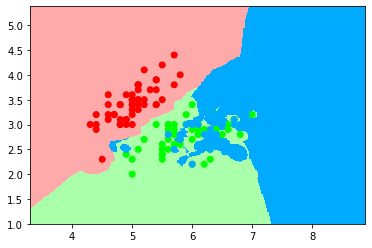

In [61]:
n_neighbors= 3
iris = load_iris()
X = iris.data[:, :2]
y = iris.target
h = .02

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00','#00AAFF'])

# instance of Neighbours Classifier and fit the data.
clf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
clf.fit(X, y)

#Min, max and limits
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
np.arange(y_min, y_max, h))

# predict class using data and kNN classifier
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Result into color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# plotting the trained points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

## Evaluation:

The accuracy scores for different values of k; k=3, k=5 ,k=7 and k =9 are 79, 81, 83 and 83.4%. The error rates are 0.20,0.18, 0.16 and 0.163 respectively.The model with k = 9 can be presented to the client. 

## References:

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.any.html

https://medium.com/@Cambridge_Spark/tutorial-introduction-to-missing-data-imputation-4912b51c34eb

https://stackoverflow.com/questions/44097633/imputing-missing-values-using-a-linear-regression-in-python

https://stackoverflow.com/questions/44097633/imputing-missing-values-using-a-linear-regression-in-python

CS5402 Basic Techniques - K Nearest Neighbour.pptx

CS5402 Regression.pptx